# (не)КодИИм 02/24: Деревья Решений

In [14]:
import pandas as pd
import numpy as np

In [5]:
import requests

headers = {"User-Agent": "ChatGPT", "Content-Type": "application/json;charset=UTF-8"}

response = requests.get(
    "https://2700chess.com/?per-page=100",
    headers=headers,
)

In [3]:
html = response.content

In [54]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')

table = soup.find('table')

In [83]:
df = pd.read_html(str(table))[0]

/tmp/ipykernel_987/1339507137.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


,#,↑↓,Name,Unnamed: 3,Classic,+/−,Unnamed: 6,Rapid,Unnamed: 8,Blitz,Unnamed: 10,Unnamed: 11,Age,Unnamed: 13
0,1,NaN,"Carlsen, Magnus",Norway,2830.0,0.0,NaN,2823.0,NaN,2886.0,NaN,NaN,33,NaN
1,2,NaN,"Caruana, Fabiano",United States of America,2804.0,0.0,NaN,2729.0,NaN,2790.0,NaN,NaN,31,NaN
2,3,NaN,"Nakamura, Hikaru",United States of America,2788.0,0.0,NaN,2746.0,NaN,2874.0,NaN,NaN,36,NaN
3,4,NaN,"Ding, Liren",China,2762.0,0.0,NaN,2818.0,NaN,2787 i,NaN,NaN,31,NaN
4,5,NaN,"Giri, Anish",Netherlands,2762.0,0.0,NaN,2687.0,NaN,2715.0,NaN,NaN,29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,↑13,"Cheparinov, Ivan",Bulgaria,2640.5,+6.5,NaN,2638.0,NaN,2593.0,NaN,NaN,37,NaN
96,97,NaN,"Ter-Sahakyan, Samvel",Armenia,2640.0,0.0,NaN,2542.0,NaN,2540.0,NaN,NaN,30,NaN
97,98,NaN,"Melkumyan, Hrant",Armenia,2640.0,0.0,NaN,2686 i,NaN,2604 i,NaN,NaN,34,NaN
98,99,↑1,"Brkic, Ante",Croatia,2638.0,0.0,NaN,2539.0,NaN,2564.0,NaN,NaN,36,NaN


In [36]:
df.columns

Index(['#', '↑↓', 'Name', 'Unnamed: 3', 'Classic', '+/−', 'Unnamed: 6',
       'Rapid', 'Unnamed: 8', 'Blitz', 'Unnamed: 10', 'Unnamed: 11', 'Age',
       'Unnamed: 13'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #            100 non-null    int64  
 1   ↑↓           70 non-null     object 
 2   Name         100 non-null    object 
 3   Unnamed: 3   100 non-null    object 
 4   Classic      100 non-null    float64
 5   +/−          100 non-null    object 
 6   Unnamed: 6   0 non-null      float64
 7   Rapid        100 non-null    object 
 8   Unnamed: 8   0 non-null      float64
 9   Blitz        100 non-null    object 
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Age          100 non-null    int64  
 13  Unnamed: 13  0 non-null      float64
dtypes: float64(6), int64(2), object(6)
memory usage: 11.1+ KB


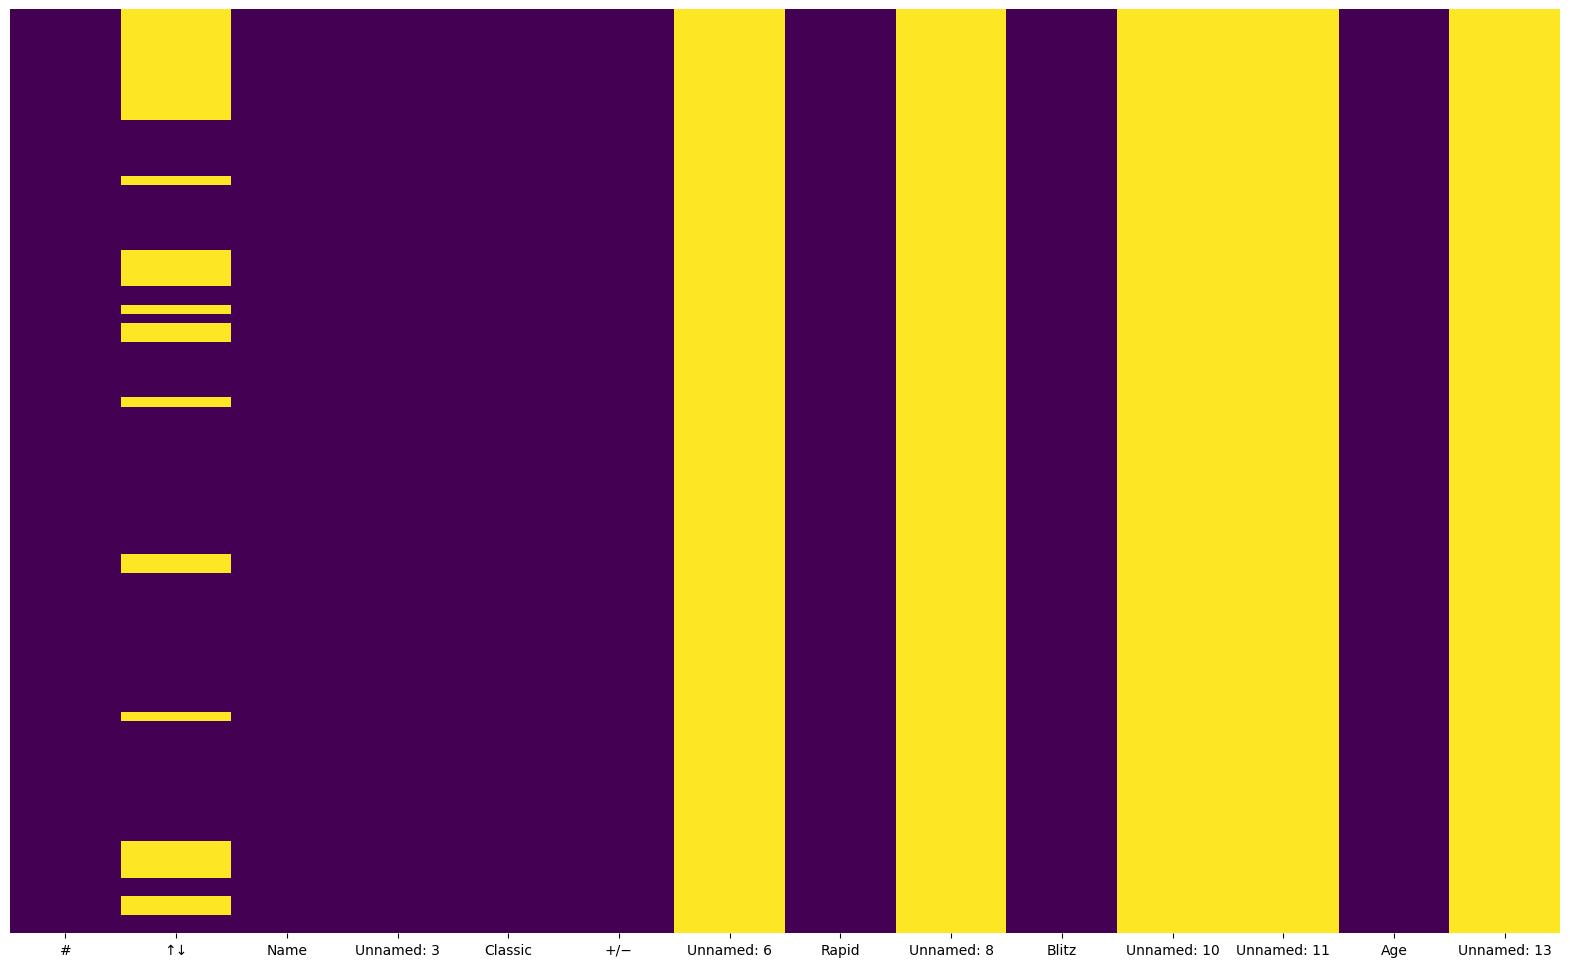

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [60]:
df = df[['Classic', 'Rapid','Blitz','Age']]

In [61]:
df

,Classic,Rapid,Blitz,Age
0,2830.0,2823.0,2886.0,33
1,2804.0,2729.0,2790.0,31
2,2788.0,2746.0,2874.0,36
3,2762.0,2818.0,2787 i,31
4,2762.0,2687.0,2715.0,29
...,...,...,...,...
95,2640.5,2638.0,2593.0,37
96,2640.0,2542.0,2540.0,30
97,2640.0,2686 i,2604 i,34
98,2638.0,2539.0,2564.0,36


0     2823.0
1     2729.0
2     2746.0
3     2818.0
4     2687.0
       ...  
95    2638.0
96    2542.0
97    2686 i
98    2539.0
99    2566.0
Name: Rapid, Length: 100, dtype: object

In [86]:
df = df[['Age', 'Classic', 'Rapid', 'Blitz']]

In [87]:
df = df.applymap(lambda x: float(str(x).replace('i', '')) if isinstance(x, str) else x)

/tmp/ipykernel_987/2936290455.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: float(str(x).replace('i', '')) if isinstance(x, str) else x)


In [88]:
df

,Age,Classic,Rapid,Blitz
0,33,2830.0,2823.0,2886.0
1,31,2804.0,2729.0,2790.0
2,36,2788.0,2746.0,2874.0
3,31,2762.0,2818.0,2787.0
4,29,2762.0,2687.0,2715.0
...,...,...,...,...
95,37,2640.5,2638.0,2593.0
96,30,2640.0,2542.0,2540.0
97,34,2640.0,2686.0,2604.0
98,36,2638.0,2539.0,2564.0


In [92]:
df.describe()

,Age,Classic,Rapid,Blitz
count,100.000000,100.000000,100.000000,100.000000
mean,31.980000,2692.184000,2649.050000,2652.550000
std,8.679454,41.476038,66.122991,80.461343
min,17.000000,2637.900000,2519.000000,2497.000000
25%,25.000000,2659.975000,2609.500000,2597.750000
50%,32.000000,2680.700000,2639.500000,2645.000000
75%,38.000000,2723.500000,2704.500000,2700.250000
max,55.000000,2830.000000,2823.000000,2886.000000


In [89]:
X, y = df.drop('Blitz', axis=1), df.Blitz

In [91]:
X

,Age,Classic,Rapid
0,33,2830.0,2823.0
1,31,2804.0,2729.0
2,36,2788.0,2746.0
3,31,2762.0,2818.0
4,29,2762.0,2687.0
...,...,...,...
95,37,2640.5,2638.0
96,30,2640.0,2542.0
97,34,2640.0,2686.0
98,36,2638.0,2539.0


In [93]:
y

0     2886.0
1     2790.0
2     2874.0
3     2787.0
4     2715.0
       ...  
95    2593.0
96    2540.0
97    2604.0
98    2564.0
99    2555.0
Name: Blitz, Length: 100, dtype: float64

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

In [139]:
from sklearn.tree import DecisionTreeRegressor

In [159]:
tree = DecisionTreeRegressor(max_depth=2)

In [160]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [161]:
y_pred = tree.predict(X_test)

In [157]:
from sklearn.metrics import mean_absolute_error

In [162]:
mean_absolute_error(y_test, y_pred)

42.74053763440859

In [163]:
from sklearn.tree import plot_tree

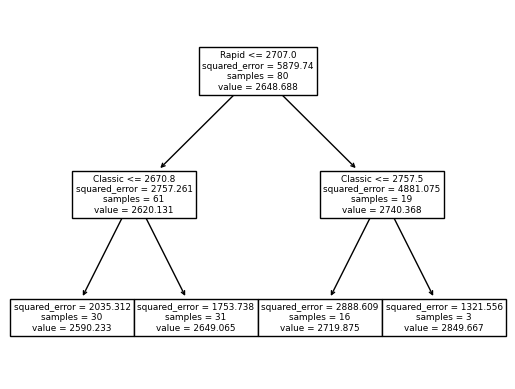

In [172]:
plot_tree(tree, feature_names=["Age", "Classic", "Rapid"]);

In [173]:
from sklearn.datasets import make_moons, make_circles # import function from the library
import random
random.seed(1)

N = 1000

X, y = make_circles(n_samples=N, noise=0.1, factor=0.6, random_state=1)

#adding noise
for i, yy in enumerate(y):
    if random.randint(0,30)% 30 == 0:
        y[i] = (y[i]+1)%2

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.5,    # 20% for test, 80% for train
                                                    random_state=123) # shuffle objects before split

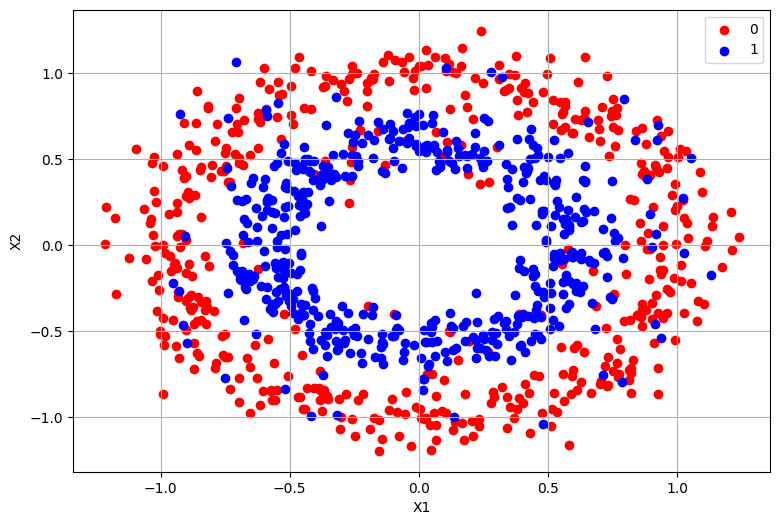

In [174]:
# Create an figure with a custom size
plt.figure(figsize=(9, 6))

# Plot all objects with y == 0 (class 0)
plt.scatter(X[y == 0, 0],     # selects all objects with y == 0 and the 1st column of X
            X[y == 0, 1],     # selects all objects with y == 0 and the 2nd column of X
            color='r',        # points color
            label='0')        # label for the plot legend


# Plot all objects with y == 1 (class 1)
plt.scatter(X[y == 1, 0],     # selects all objects with y == 1 and the 1st column of X
            X[y == 1, 1],     # selects all objects with y == 1 and the 2nd column of X
            color='b',        # points color
            label='1')        # label for the plot legend

plt.xlabel('X1') # set up X-axis label
plt.ylabel('X2') # set up Y-axis label

plt.legend(loc='best') # create the plot legend and set up it position
plt.grid() # create grid on the plot

plt.show() # display the plot

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, mean_squared_error

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       251
           1       0.84      0.82      0.83       249

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



In [182]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot_desicion_boundaries():
    # Create an figure with a custom size
    plt.figure(figsize=(9, 6))

    # Plot all objects with y == 0 (class 0)
    plt.scatter(X_test[y_test == 0, 0],     # selects all objects with y == 0 and the 1st column of X
                X_test[y_test == 0, 1],     # selects all objects with y == 0 and the 2nd column of X
                color='r',                  # points color
                label='0')                  # label for the plot legend


    # Plot all objects with y == 1 (class 1)
    plt.scatter(X_test[y_test == 1, 0],     # selects all objects with y == 1 and the 1st column of X
                X_test[y_test == 1, 1],     # selects all objects with y == 1 and the 2nd column of X
                color='b',                  # points color
                label='1')                  # label for the plot legend


    ### THIS IS JUST MAGIC :)

    # plot decision boundary
    h=0.01
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] # Probas

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.5, levels=1)

    ### THE END OF THE MAGIC


    plt.xlabel('X1') # set up X-axis label
    plt.ylabel('X2') # set up Y-axis label

    plt.legend(loc='best') # create the plot legend and set up it position
    plt.grid() # create grid on the plot
    plt.colorbar()

    plt.show() # display the plot

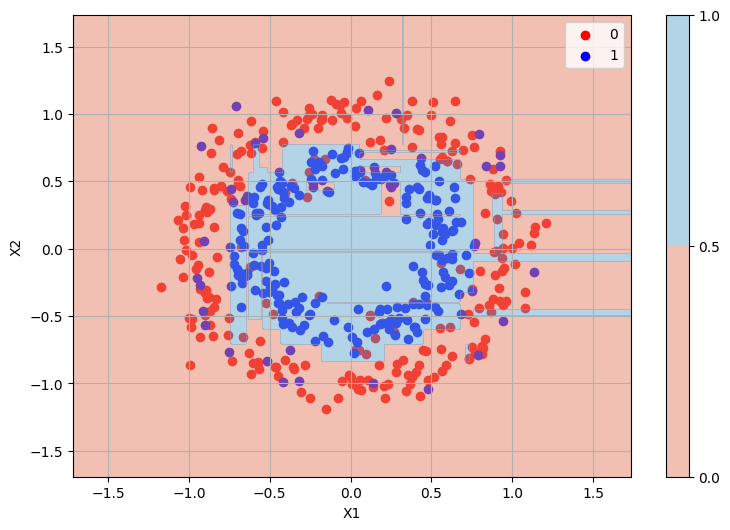

In [183]:
plot_desicion_boundaries()

Max_depth:  1
              precision    recall  f1-score   support

           0       0.84      0.24      0.38       251
           1       0.56      0.95      0.70       249

    accuracy                           0.60       500
   macro avg       0.70      0.60      0.54       500
weighted avg       0.70      0.60      0.54       500



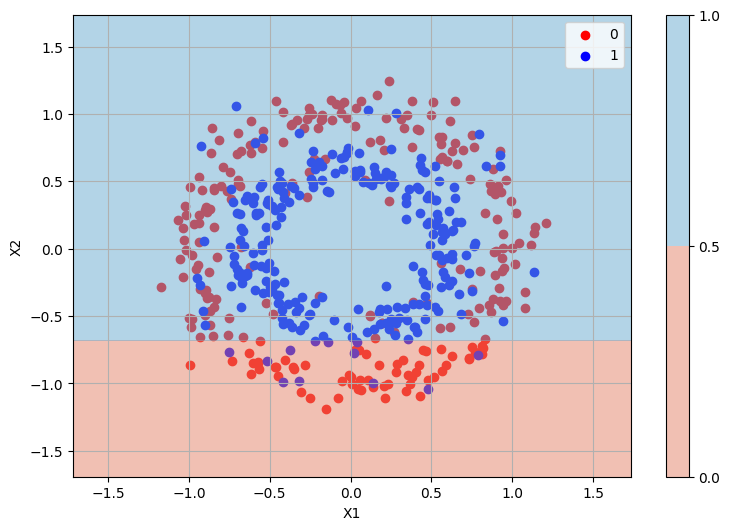

Max_depth:  2
              precision    recall  f1-score   support

           0       0.81      0.47      0.60       251
           1       0.63      0.89      0.74       249

    accuracy                           0.68       500
   macro avg       0.72      0.68      0.67       500
weighted avg       0.72      0.68      0.67       500



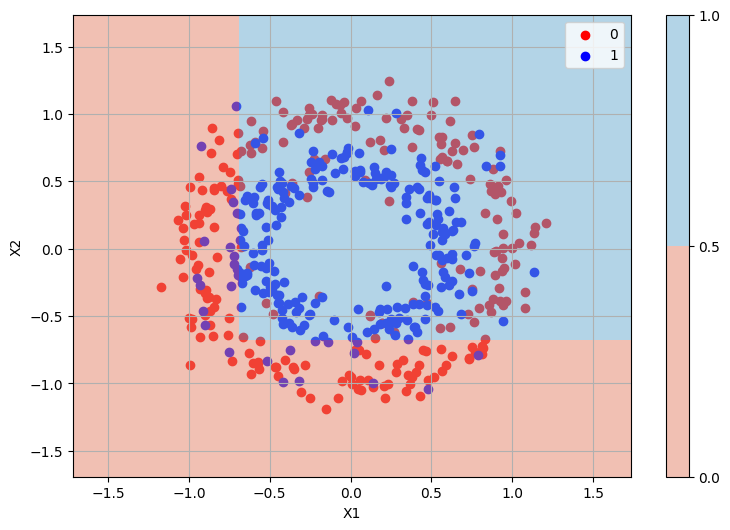

Max_depth:  4
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       251
           1       0.84      0.83      0.84       249

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



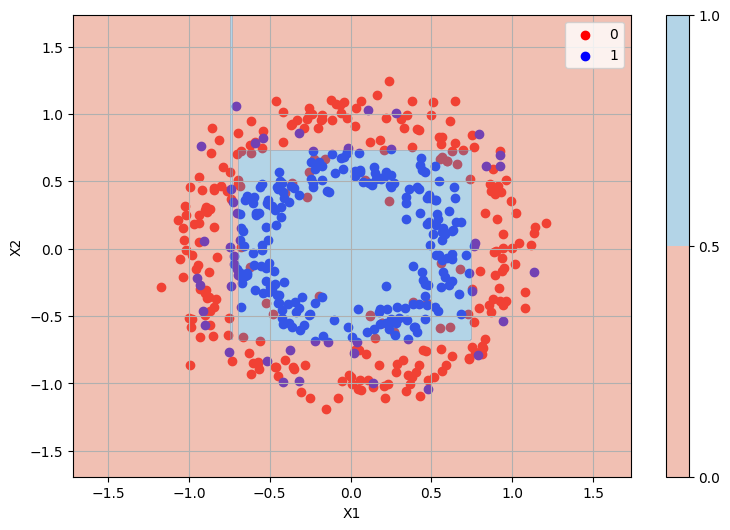

Max_depth:  7
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       251
           1       0.83      0.82      0.82       249

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



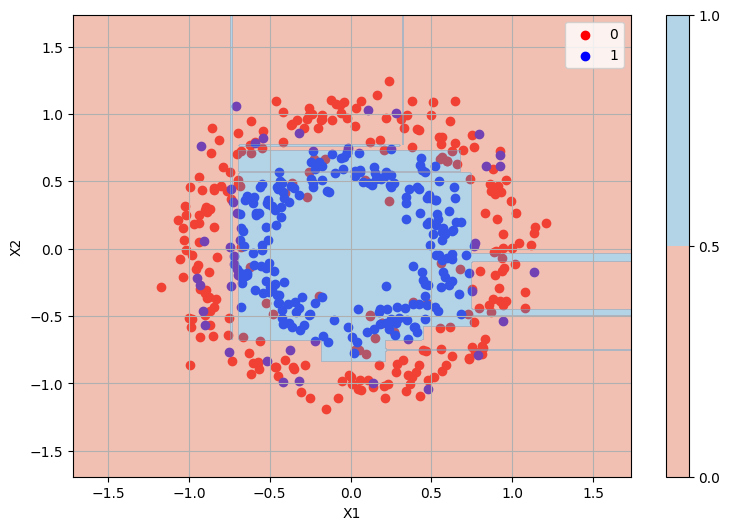

Max_depth:  10
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       251
           1       0.84      0.81      0.82       249

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



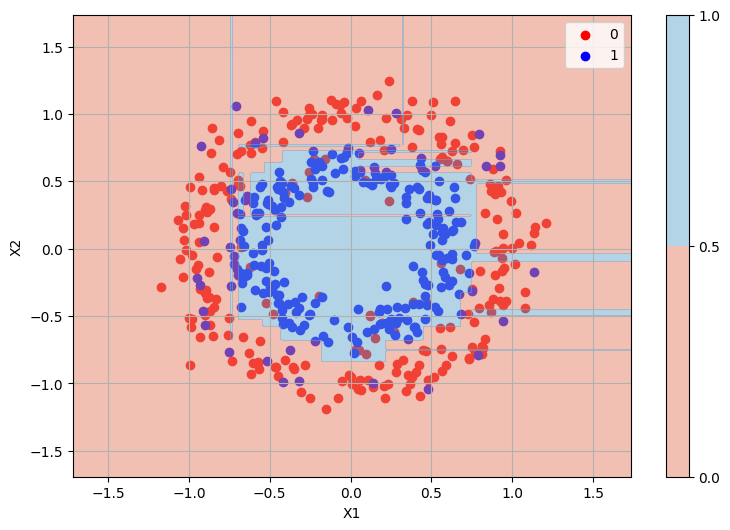

Max_depth:  15
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       251
           1       0.83      0.79      0.81       249

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



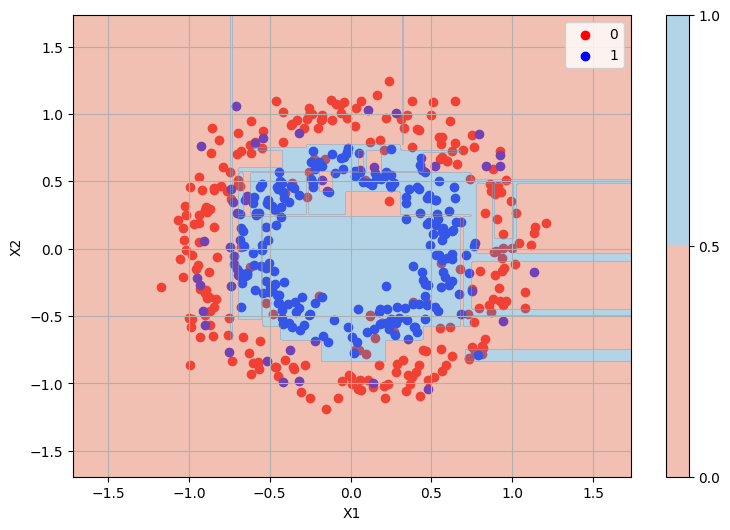

Max_depth:  25
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       251
           1       0.82      0.78      0.80       249

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



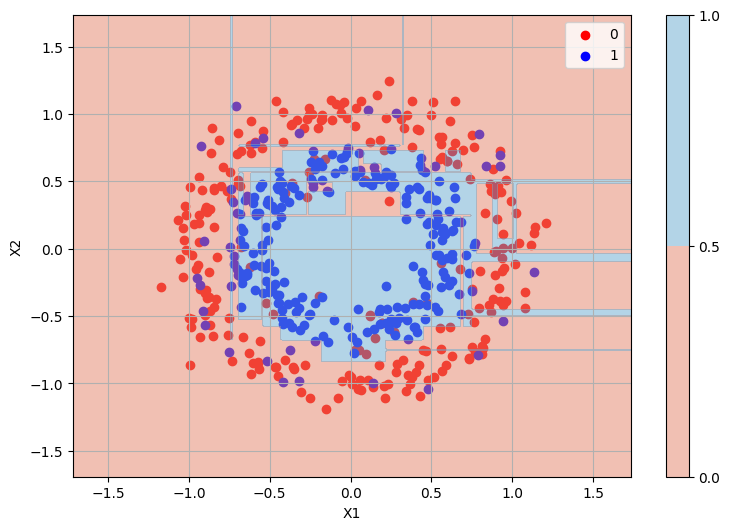

Max_depth:  50
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       251
           1       0.83      0.80      0.81       249

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



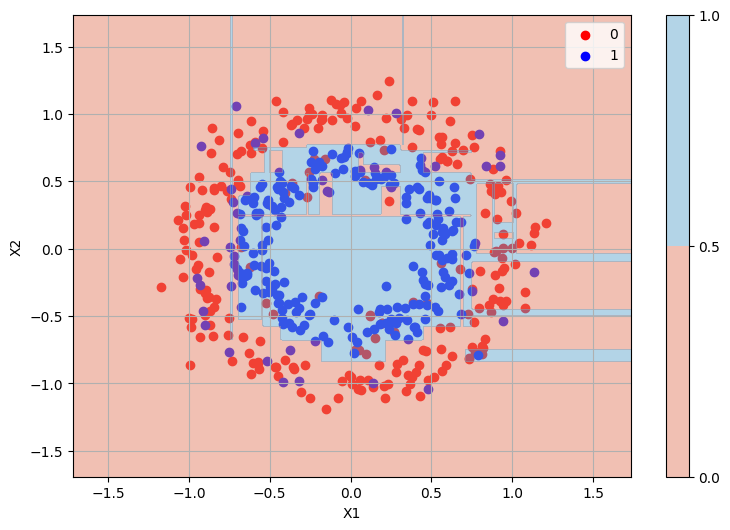

In [184]:
for depth in [1,2,4,7,10,15,25,50]:
    print('Max_depth: ', depth)
    clf = DecisionTreeClassifier(max_depth=depth, criterion='gini')
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(classification_report(y_test, pred))
    plot_desicion_boundaries()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d5b3784-c0d1-42b2-b62a-f221187b0e50' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>